In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
housedata=pd.read_csv("house price data.csv")

In [3]:
housedata

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
housedata.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [5]:
housedata.tail(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1450         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1451         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1452         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1453         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1450      9   2009        WD         Normal     136000  
1451      5   2009       New        Partial     287090  
1452      5   2006        WD         Normal     145000  
1453      7   2006        WD        Abnorml      84500  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[10 rows x 81 columns]

In [6]:
housedata.shape

(1460, 81)

In [7]:
housedata.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
null_values = housedata.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
housedata=housedata.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [11]:
housedata.shape

(1460, 75)

In [12]:
null_values = housedata.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3111106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housedata['LotFrontage'])


<Axes: xlabel='LotFrontage', ylabel='Density'>

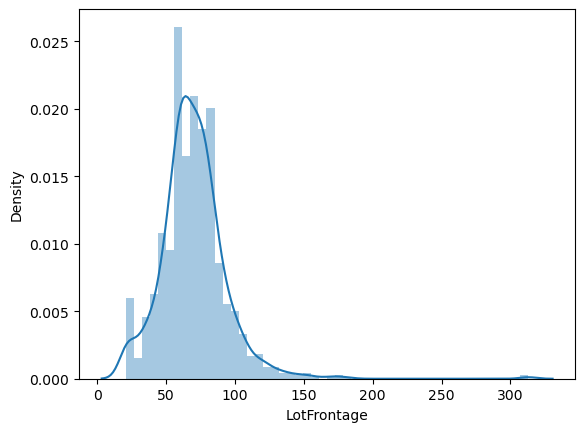

In [13]:
sns.distplot(housedata['LotFrontage'])

In [14]:
housedata['LotFrontage'].fillna(housedata['LotFrontage'].median(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1132035085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['LotFrontage'].fillna(housedata['LotFrontage'].median(),inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3557838295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housedata['MasVnrArea'])


<Axes: xlabel='MasVnrArea', ylabel='Density'>

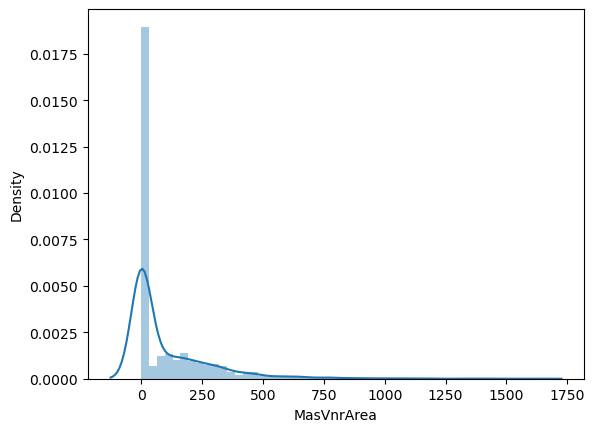

In [15]:
sns.distplot(housedata['MasVnrArea'])

In [16]:
housedata['MasVnrArea'].fillna(housedata['MasVnrArea'].median(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\384757721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['MasVnrArea'].fillna(housedata['MasVnrArea'].median(),inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1365902764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housedata['GarageYrBlt'])


<Axes: xlabel='GarageYrBlt', ylabel='Density'>

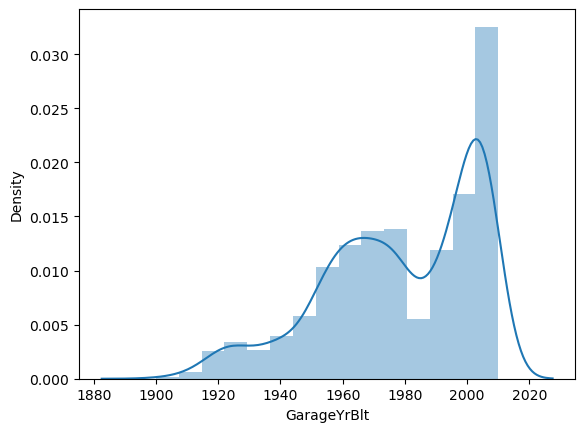

In [17]:
sns.distplot(housedata['GarageYrBlt'])

In [18]:
housedata['GarageYrBlt'].fillna(housedata['GarageYrBlt'].median(),inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1420590956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['GarageYrBlt'].fillna(housedata['GarageYrBlt'].median(),inplace=True)


In [19]:
null_values = housedata.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [20]:
housedata['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [21]:
housedata.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2891471007.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BsmtQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [22]:
housedata['BsmtQual'].fillna(housedata['BsmtQual'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\301329720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['BsmtQual'].fillna(housedata['BsmtQual'].mode()[0], inplace =True)


In [23]:
housedata['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [24]:
housedata.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3103545210.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BsmtCond':{'TA':0, 'Gd':1, 'Fa':2, 'Po':3}}, inplace=True)


In [25]:
housedata['BsmtCond'].fillna(housedata['BsmtCond'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3488631050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['BsmtCond'].fillna(housedata['BsmtCond'].mode()[0], inplace =True)


In [26]:
housedata['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [27]:
housedata.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1767455342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BsmtExposure':{'No':0, 'Av':1, 'Gd':2, 'Mn':3}}, inplace=True)


In [28]:
housedata['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [29]:
housedata.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\4162560549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BsmtFinType1':{'Unf':0, 'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5}}, inplace=True)


In [30]:
housedata['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [31]:
housedata.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1938099101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BsmtFinType2':{'Unf':0, 'Rec':1, 'LwQ':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}}, inplace=True)


In [32]:
housedata['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [33]:
housedata.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1361485937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Electrical':{'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4}}, inplace=True)


In [34]:
housedata['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [35]:
housedata.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2063039666.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'GarageType':{'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'Basment':3, 'CarPort':4, '2Types':5}}, inplace=True)


In [36]:
housedata['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [37]:
housedata.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\154925981.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'GarageFinish':{'Unf':0, 'RFn':1, 'Fin':2}}, inplace=True)


In [38]:
housedata['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [39]:
housedata.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1486304071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'GarageQual':{'TA':0, 'Fa':1, 'Gd':2, 'Ex':3, 'Po':4}}, inplace=True)


In [40]:
housedata['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [41]:
housedata.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1372575588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'GarageCond':{'TA':0, 'Fa':1, 'Gd':2, 'Po':3, 'Ex':4}}, inplace=True)


In [42]:
housedata['BsmtExposure'].fillna(housedata['BsmtExposure'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1234684536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['BsmtExposure'].fillna(housedata['BsmtExposure'].mode()[0], inplace =True)


In [43]:
housedata['BsmtFinType1'].fillna(housedata['BsmtFinType1'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2717595131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['BsmtFinType1'].fillna(housedata['BsmtFinType1'].mode()[0], inplace =True)


In [44]:
housedata['BsmtFinType2'].fillna(housedata['BsmtFinType2'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\694724810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['BsmtFinType2'].fillna(housedata['BsmtFinType2'].mode()[0], inplace =True)


In [45]:
housedata['Electrical'].fillna(housedata['Electrical'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2600044462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['Electrical'].fillna(housedata['Electrical'].mode()[0], inplace =True)


In [46]:
housedata['GarageType'].fillna(housedata['GarageType'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3615398534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['GarageType'].fillna(housedata['GarageType'].mode()[0], inplace =True)


In [47]:
housedata['GarageFinish'].fillna(housedata['GarageFinish'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2706858720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['GarageFinish'].fillna(housedata['GarageFinish'].mode()[0], inplace =True)


In [48]:
housedata['GarageQual'].fillna(housedata['GarageQual'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\408875157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['GarageQual'].fillna(housedata['GarageQual'].mode()[0], inplace =True)


In [49]:
housedata['GarageCond'].fillna(housedata['GarageCond'].mode()[0], inplace =True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1146594373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housedata['GarageCond'].fillna(housedata['GarageCond'].mode()[0], inplace =True)


In [50]:
null_values = housedata.isnull().sum()
null_values = null_values[null_values>0]
print(null_values)

Series([], dtype: int64)


In [51]:
housedata.info()

housedata['MSZoning'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [52]:
housedata.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\544700203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'MSZoning':{'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4}}, inplace=True)


In [53]:
housedata['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [54]:
housedata.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\4264247970.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Street':{'Pave':0, 'Grvl':1}}, inplace=True)


In [55]:
housedata['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [56]:
housedata.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3205247237.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'LotShape':{'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3}}, inplace=True)


In [57]:
housedata['LandContour'].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [58]:
housedata.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2923852741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'LandContour':{'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3}}, inplace=True)


In [59]:
housedata['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [60]:
housedata.replace({'Utilities':{'AllPub':0,'NoSeWa':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3358778833.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Utilities':{'AllPub':0,'NoSeWa':1}}, inplace=True)


In [61]:
housedata['LotConfig'].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [62]:
housedata.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\687822844.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'LotConfig':{'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4}}, inplace=True)


In [63]:
housedata['LandSlope'].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [64]:
housedata.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2953885262.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'LandSlope':{'Gtl':0, 'Mod':1, 'Sev':2}}, inplace=True)


In [65]:
housedata['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [66]:
housedata.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4,'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9,'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14,'IDOTRR':15, 'ClearCr':16, 'SWISU':17, 'StoneBr':18, 'Blmngtn':19,'MeadowV':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1524605745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Neighborhood':{'NAmes':0, 'CollgCr':1, 'OldTown':2, 'Edwards':3, 'Somerst':4,'Gilbert':5, 'NridgHt':6, 'Sawyer':7, 'NWAmes':8, 'SawyerW':9,'BrkSide':10, 'Crawfor':11, 'Mitchel':12, 'NoRidge':13, 'Timber':14,'IDOTRR':15, 'ClearCr':16, 'SWISU':17, 'StoneBr':18, 'Blmngtn':19,'MeadowV':20, 'BrDale':21, 'Veenker':22, 'NPkVill':23, 'Blueste':24}}, inplace=True)


In [67]:
housedata['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [68]:
housedata.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4,'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2968445025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Condition1':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':4,'RRAe':5, 'PosA':6, 'RRNn':7, 'RRNe':8}}, inplace=True)


In [69]:
housedata['Condition2'].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [70]:
housedata.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4,'PosA':5, 'RRAn':6, 'RRAe':7}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1363421436.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Condition2':{'Norm':0, 'Feedr':1, 'Artery':2, 'RRNn':3, 'PosN':4,'PosA':5, 'RRAn':6, 'RRAe':7}}, inplace=True)


In [71]:
housedata['BldgType'].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [72]:
housedata.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1622272275.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'BldgType':{'1Fam':0, 'TwnhsE':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4}}, inplace=True)


In [73]:
housedata['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [74]:
housedata.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4,'1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2485516433.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'HouseStyle':{'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4,'1.5Unf':5, '2.5Unf':6, '2.5Fin':7}}, inplace=True)


In [75]:
housedata['RoofStyle'].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [76]:
housedata.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4,'Shed':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3533656356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'RoofStyle':{'Gable':0, 'Hip':1, 'Flat':2, 'Gambrel':3, 'Mansard':4,'Shed':5}}, inplace=True)


In [77]:
housedata['RoofMatl'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [78]:
housedata.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4,'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2467993513.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'RoofMatl':{'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Metal':4,'Membran':5, 'Roll':6, 'ClyTile':7}}, inplace=True)


In [79]:
housedata['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [80]:
housedata.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4,'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9,'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3905251778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Exterior1st':{'VinylSd':0, 'HdBoard':1, 'MetalSd':2, 'Wd Sdng':3, 'Plywood':4,'CemntBd':5, 'BrkFace':6, 'WdShing':7, 'Stucco':8, 'AsbShng':9,'BrkComm':10, 'Stone':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14}}, inplace=True)


In [81]:
housedata['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [82]:
housedata.replace({'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4,'CmentBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14,'CBlock':15}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2643806566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Exterior2nd':{'VinylSd':0, 'MetalSd':1, 'HdBoard':2, 'Wd Sdng':3, 'Plywood':4,'CmentBd':5, 'Wd Shng':6, 'Stucco':7, 'BrkFace':8, 'AsbShng':9, 'ImStucc':10, 'Brk Cmn':11, 'Stone':12, 'AsphShn':13, 'Other':14,'CBlock':15}}, inplace=True)


In [83]:
housedata['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [84]:
housedata.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2211283716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'ExterQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3}}, inplace=True)


In [85]:
housedata['ExterCond'].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [86]:
housedata.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\2903037906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'ExterCond':{'TA':0, 'Gd':1, 'Fa':2, 'Ex':3, 'Po':4}}, inplace=True)


In [87]:
housedata['Foundation'].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [88]:
housedata.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4,'Wood':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1332371033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Foundation':{'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4,'Wood':5}}, inplace=True)


In [89]:
housedata['Heating'].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [90]:
housedata.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4,'Floor':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\577617420.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Heating':{'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4,'Floor':5}}, inplace=True)


In [91]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [92]:
housedata['HeatingQC'].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [93]:
housedata.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\154309116.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'HeatingQC':{'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4}}, inplace=True)


In [94]:
housedata['CentralAir'].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [95]:
housedata.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1712519465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'CentralAir':{'Y':0, 'N':1}}, inplace=True)


In [96]:
housedata['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [97]:
housedata.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3,}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3671446509.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'KitchenQual':{'TA':0, 'Gd':1, 'Ex':2, 'Fa':3,}}, inplace=True)


In [98]:
housedata['Functional'].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [99]:
housedata.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5,'Sev':6}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\1673109765.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'Functional':{'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5,'Sev':6}}, inplace=True)


In [100]:
housedata['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [101]:
housedata.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\919531151.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'PavedDrive':{'Y':0, 'N':1, 'P':2}}, inplace=True)


In [102]:
housedata['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [103]:
housedata.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4,'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\3320206099.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'SaleType':{'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'ConLI':4,'ConLw':5, 'CWD':6, 'Oth':7, 'Con':8}}, inplace=True)


In [104]:
housedata['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [105]:
housedata.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4,'AdjLand':5}}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_26344\71083342.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housedata.replace({'SaleCondition':{'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4,'AdjLand':5}}, inplace=True)


In [106]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [108]:
correlation=housedata.corr()
correlation

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156 -0.021713    -0.009921 -0.033226   
MSSubClass     0.011156    1.000000  0.280306    -0.356718 -0.139781   
MSZoning      -0.021713    0.280306  1.000000    -0.239076 -0.164093   
LotFrontage   -0.009921   -0.356718 -0.239076     1.000000  0.304522   
LotArea       -0.033226   -0.139781 -0.164093     0.304522  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172   -0.013585  0.030967     0.010451  0.001205   
YrSold         0.000712   -0.021407 -0.002833     0.006380 -0.014261   
SaleType      -0.017218    0.016085  0.073850     0.010798 -0.013285   
SaleCondition -0.016834    0.004788  0.099049     0.018490 -0.016193   
SalePrice     -0.021917   -0.084284 -0.183642     0.334771  0.263843   

                 Street  LotShape  LandContour  Utilities  LotConfig  ...  \
Id            -0.008916 -0.024071     0.008332   0.013324  -0.014160  ...   
MSSubClass     0.024969 -0.115361    -0.025090  -0.022844  -0.037573  ...   
MSZoning       0.115502 -0.188404     0.008574  -0.011701  -0.082953  ...   
LotFrontage    0.037349  0.191420     0.084287  -0.001027   0.046862  ...   
LotArea        0.197131  0.315484     0.339008   0.010123   0.131099  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.003690  0.026617     0.053402  -0.051552  -0.024821  ...   
YrSold         0.025043 -0.037391    -0.025586   0.023353   0.011358  ...   
SaleType       0.021569 -0.000301    -0.020351   0.058278   0.011157  ...   
SaleCondition  0.029729 -0.030278     0.027309   0.057619  -0.007482  ...   
SalePrice     -0.041036  0.267759     0.073042  -0.014314   0.092316  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                  0.002889  -0.046635     0.001330  0.057044 -0.006242   
MSSubClass         -0.012037  -0.043825    -0.026030  0.008283 -0.007683   
MSZoning            0.124006  -0.046646    -0.063773 -0.030701 -0.017745   
LotFrontage         0.010287   0.061945     0.037655  0.180819 -0.000255   
LotArea            -0.018340   0.020423     0.043160  0.077672  0.038068   
...                      ...        ...          ...       ...       ...   
MoSold             -0.028887   0.029474     0.023217 -0.033737 -0.006495   
YrSold             -0.009916   0.018645     0.010694 -0.059689  0.004906   
SaleType           -0.013426  -0.002435    -0.029667 -0.009903 -0.014184   
SaleCondition       0.006516  -0.003393    -0.014412  0.095828 -0.031561   
SalePrice          -0.128578   0.044584     0.111447  0.092404 -0.021190   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.021172  0.000712 -0.017218      -0.016834  -0.021917  
MSSubClass    -0.013585 -0.021407  0.016085       0.004788  -0.084284  
MSZoning       0.030967 -0.002833  0.073850       0.099049  -0.183642  
LotFrontage    0.010451  0.006380  0.010798       0.018490   0.334771  
LotArea        0.001205 -0.014261 -0.013285      -0.016193   0.263843  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.145721  0.042867       0.033540   0.046432  
YrSold        -0.145721  1.000000 -0.020916      -0.095609  -0.028923  
SaleType       0.042867 -0.020916  1.000000       0.232602   0.081115  
SaleCondition  0.033540 -0.095609  0.232602       1.000000   0.004591  
SalePrice      0.046432 -0.028923  0.081115       0.004591   1.000000  

[75 rows x 75 columns]

<Axes: >

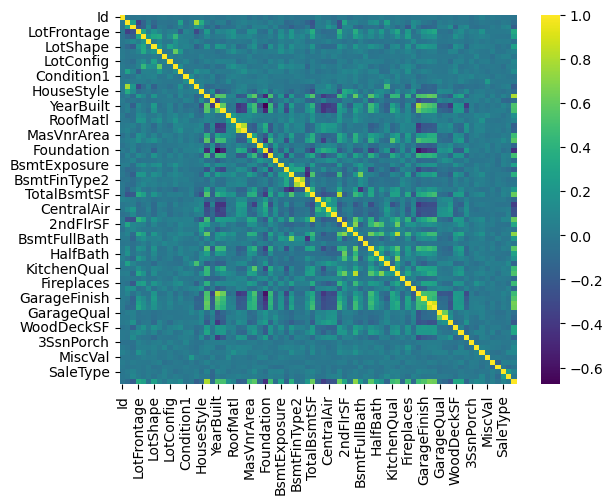

In [109]:
sns.heatmap(correlation,cbar=True,square=False,annot_kws={'size':8},cmap='viridis')

In [110]:
x= housedata.drop('SalePrice', axis=1)

In [111]:
y = housedata['SalePrice']

In [112]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [114]:
x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape, y.shape

((1460, 74), (1168, 74), (292, 74), (1168,), (292,), (1460,))

In [115]:
model= RandomForestRegressor()

In [116]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [117]:

training_data_predict = model.predict(x_train)
training_data_accuracy = metrics.r2_score(training_data_predict, y_train)
print('accuracy of training data:', training_data_accuracy)

accuracy of training data: 0.9768917567153097


In [118]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = metrics.r2_score(testing_data_predict, y_test)
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.8498916671154801


In [119]:
absolute_error_train = metrics.mean_absolute_error(training_data_predict, y_train)
print('absolute error of train data', absolute_error_train)

absolute error of train data 6494.27073630137


In [120]:
absolute_error_test = metrics.mean_absolute_error(testing_data_predict, y_test)
print('absolute error of test data', absolute_error_test)


absolute error of test data 18886.760171232876


In [125]:
input_data=(3,	60,	0,	68.0,	11250,	0,	1,	0,	0,	0,	0,	1,	0,	0	,0,	1,	7,	5,	2001,	2002,	0,	0,	0,	0,	162.0	,1,	0,	0,	1.0	,0.0,	3.0	,1.0,	486	,0.0,	0,	434,	920	,0,	0,	0,	0.0,	920,	866	,0,	1786,	1	,0,	2,	1,	3,	1,	1,	6,	0,	1,	0.0,	2001.0,	1.0	,2,	608,	0.0,	0.0,	0,	0	,42	,0	,0	,0	,0	,0,	9,	2008	,0,	0	)
input_data_as_np = np.asarray(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print('predicted price of house', prediction[0])

predicted price of house 219620.3


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [123]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)
pd.set_option('display.max_colwidth',None)

In [124]:
housedata

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0        1          60         0         65.0     8450       0         0   
1        2          20         0         80.0     9600       0         0   
2        3          60         0         68.0    11250       0         1   
3        4          70         0         60.0     9550       0         1   
4        5          60         0         84.0    14260       0         1   
5        6          50         0         85.0    14115       0         1   
6        7          20         0         75.0    10084       0         0   
7        8          60         0         69.0    10382       0         1   
8        9          50         1         51.0     6120       0         0   
9       10         190         0         50.0     7420       0         0   
10      11          20         0         70.0    11200       0         0   
11      12          60         0         85.0    11924       0         1   
12      13          20         0         69.0    12968       0         2   
13      14          20         0         91.0    10652       0         1   
14      15          20         0         69.0    10920       0         1   
15      16          45         1         51.0     6120       0         0   
16      17          20         0         69.0    11241       0         1   
17      18          90         0         72.0    10791       0         0   
18      19          20         0         66.0    13695       0         0   
19      20          20         0         70.0     7560       0         0   
20      21          60         0        101.0    14215       0         1   
21      22          45         1         57.0     7449       0         0   
22      23          20         0         75.0     9742       0         0   
23      24         120         1         44.0     4224       0         0   
24      25          20         0         69.0     8246       0         1   
25      26          20         0        110.0    14230       0         0   
26      27          20         0         60.0     7200       0         0   
27      28          20         0         98.0    11478       0         0   
28      29          20         0         47.0    16321       0         1   
29      30          30         1         60.0     6324       0         1   
30      31          70         4         50.0     8500       0         0   
31      32          20         0         69.0     8544       0         1   
32      33          20         0         85.0    11049       0         0   
33      34          20         0         70.0    10552       0         1   
34      35         120         0         60.0     7313       0         0   
35      36          60         0        108.0    13418       0         0   
36      37          20         0        112.0    10859       0         0   
37      38          20         0         74.0     8532       0         0   
38      39          20         0         68.0     7922       0         0   
39      40          90         0         65.0     6040       0         0   
40      41          20         0         84.0     8658       0         0   
41      42          20         0        115.0    16905       0         0   
42      43          85         0         69.0     9180       0         1   
43      44          20         0         69.0     9200       0         1   
44      45          20         0         70.0     7945       0         0   
45      46         120         0         61.0     7658       0         0   
46      47          50         0         48.0    12822       0         1   
47      48          20         2         84.0    11096       0         0   
48      49         190         1         33.0     4456       0         0   
49      50          20         0         66.0     7742       0         0   
50      51          60         0         69.0    13869       0         2   
51      52          50         1         52.0     6240  